In [51]:
pip install minisom

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

In [53]:
data = pd.read_csv('/content/Credit_Card_Applications.csv')

In [54]:
data = data.drop(columns = ['Class', 'CustomerID'])

In [55]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159


In [56]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [57]:
param_grid = {
    'x': [5, 10, 15],
    'y': [5, 10, 15],
    'sigma': [0.5, 1.0, 1.5],
    'learning_rate': [0.1, 0.5, 0.9],
    'iterations': [500, 1000, 1500]
}
def train_som(x, y, sigma, learning_rate, iterations):
    som = MiniSom(x=x, y=y, input_len=data_normalized.shape[1], sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(data_normalized)
    som.train(data_normalized, iterations)

    # Calculate the distance to the winning neurons for evaluation
    distances = np.zeros(data_normalized.shape[0])
    for i in range(data_normalized.shape[0]):
        w = som.winner(data_normalized[i])
        distances[i] = np.linalg.norm(data_normalized[i] - som.get_weights()[w])

    return np.mean(distances)  # Return average distance as a metric

In [58]:
results = []
for x in param_grid['x']:
    for y in param_grid['y']:
        for sigma in param_grid['sigma']:
            for learning_rate in param_grid['learning_rate']:
                for iterations in param_grid['iterations']:
                    score = train_som(x, y, sigma, learning_rate, iterations)
                    results.append((x, y, sigma, learning_rate, iterations, score))
results_df = pd.DataFrame(results, columns=['x', 'y', 'sigma', 'learning_rate', 'iterations', 'average_distance'])

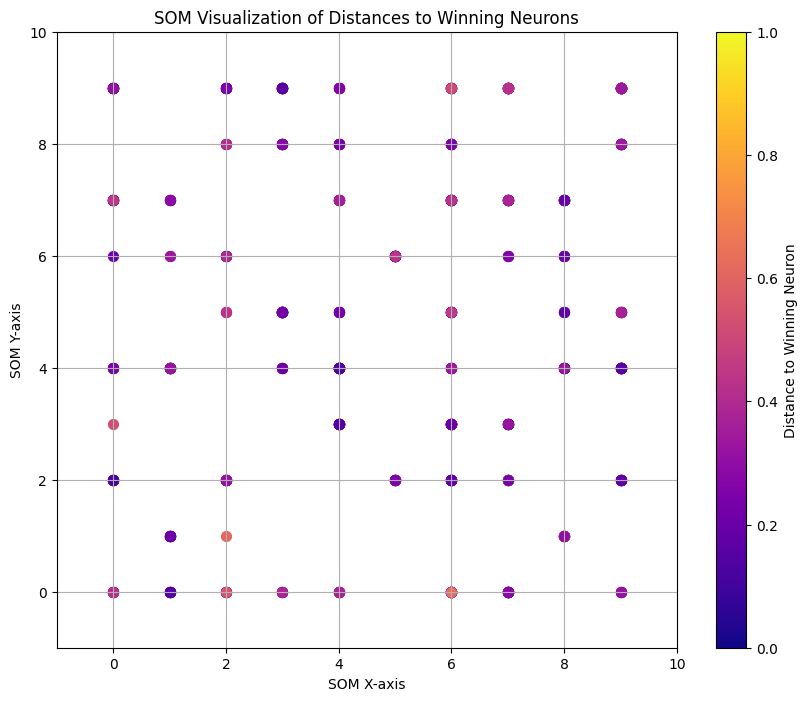

In [61]:
# Create a scatter plot to visualize distances to the winning neurons
plt.figure(figsize=(10, 8))

for i in range(data_normalized.shape[0]):
    w = som.winner(data_normalized[i])
    distance_to_node = np.linalg.norm(data_normalized[i] - som.get_weights()[w])

    # Color based on distance to the node
    plt.scatter(w[0], w[1], color=plt.cm.plasma(distance_to_node / np.max(distances)), s=50)

plt.xlim(-1, som.get_weights().shape[0])
plt.ylim(-1, som.get_weights().shape[1])
plt.title('SOM Visualization of Distances to Winning Neurons')
plt.xlabel('SOM X-axis')
plt.ylabel('SOM Y-axis')
plt.colorbar(plt.cm.ScalarMappable(cmap='plasma'), label='Distance to Winning Neuron')
plt.grid()
plt.show()


APPLICATION:

Applications of Self-Organizing Networks
SOMs have various applications, including:

Data Visualization: Reducing the dimensionality of data for easier visualization and interpretation.

Clustering: Grouping similar data points for customer segmentation.

Anomaly Detection: Identifying outliers in data, such as fraudulent transactions.

Pattern Recognition: Used in image recognition, speech recognition, and natural language processing.

Feature Extraction: Reducing the number of features while preserving essential information.

Loss Function for SOMs
In Self-Organizing Maps, the loss function can be considered in terms of the following:

Quantization Error: Measures how well the map represents the input data. It is calculated as the distance between input vectors and their best-matching units (BMUs).

Topological Error: Measures how well the topology of the input space is preserved in the map. It is based on the distances between neighboring neurons and their corresponding input data.

Disadvantages of Kohonen Maps
Some disadvantages of Kohonen Maps (SOMs) include:

Sensitivity to Initialization: The initial weights can significantly affect the final mapping, leading to different results in different runs.

Fixed Map Size: The size of the map needs to be predetermined, which might not be suitable for all datasets.

High Dimensionality: SOMs can struggle with high-dimensional data, leading to a phenomenon known as the "curse of dimensionality."

Difficulty in Parameter Tuning: Choosing the right learning rate and neighborhood function can be challenging and may require trial and error.

Limited Interpretability: The meaning of the clusters formed by SOMs can be less clear compared to other clustering algorithms, making it harder to draw conclusions.